In [1]:
import sys
print( f"Python {sys.version}\n" )

import os

import numpy as np
print( f"NumPy {np.__version__}\n" )

import pandas as pd
print( f"Pandas {pd.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]

NumPy 1.26.1

Pandas 2.1.2

Matplotlib 3.8.1

TensorFlow 2.10.1
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [2]:
# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
# np.random.seed(1234)
# tf.random.set_seed(5678)

In [3]:
import wandb
print(f'WandB {wandb.__version__}')

WandB 0.15.12


**LOAD DATA**

In [5]:
import os
import cv2
import numpy as np

# ตั้งค่าพารามิเตอร์
dataset_folder = 'data'
img_size = (224, 224)  # ขนาดที่คุณต้องการ resize รูป

x_train = []
y_train = []

# วนลูปตามโฟลเดอร์ย่อยภายในโฟลเดอร์ planes
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)

    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # อ่านรูปภาพ
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Warning: Image not loaded for file: {img_path}")
                continue

            # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert จาก BGR เป็น RGB
            img = cv2.resize(img, img_size)

            x_train.append(img)
            y_train.append(class_folder)  # ใช้ชื่อโฟลเดอร์เป็น label

**CONVERT DATA**

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(3853, 224, 224, 3)
(3853,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(x_train, test_size = 0.2, random_state = 1)
y_train, y_test = train_test_split(y_train, test_size = 0.2, random_state = 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3082, 224, 224, 3)
(3082,)
(771, 224, 224, 3)
(771,)


In [8]:
unique_labels = np.unique(y_train)
label_to_int = {label: i for i, label in enumerate(unique_labels)}

y_train = np.array([label_to_int[label] for label in y_train])
y_test = np.array([label_to_int[label] for label in y_test])


In [9]:
print( f"x_train: type={type(x_train)} , dtype={x_train.dtype} , shape={x_train.shape} , min={x_train.min(axis=None)} , max={x_train.max(axis=None)}" )
print( f"y_train: type={type(y_train)} , dtype={y_train.dtype} , shape={y_train.shape} , min={min(y_train)} , max={max(y_train)}" )
print( f"x_test: type={type(x_test)} , dtype={x_test.dtype} , shape={x_test.shape} , min={x_test.min(axis=None)} , max={x_test.max(axis=None)}"  )
print( f"y_test: type={type(y_test)} , dtype={y_test.dtype} , shape={y_test.shape} , min={min(y_test)} , max={max(y_test)}" )

x_train: type=<class 'numpy.ndarray'> , dtype=uint8 , shape=(3082, 224, 224, 3) , min=0 , max=255
y_train: type=<class 'numpy.ndarray'> , dtype=int32 , shape=(3082,) , min=0 , max=4
x_test: type=<class 'numpy.ndarray'> , dtype=uint8 , shape=(771, 224, 224, 3) , min=0 , max=255
y_test: type=<class 'numpy.ndarray'> , dtype=int32 , shape=(771,) , min=0 , max=4


In [10]:
x_train = x_train.astype('uint8')
x_test = x_test.astype('uint8')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [11]:
print( f"x_train: type={type(x_train)} , dtype={x_train.dtype} , shape={x_train.shape} , min={x_train.min(axis=None)} , max={x_train.max(axis=None)}" )
print( f"y_train: type={type(y_train)} , dtype={y_train.dtype} , shape={y_train.shape} , min={min(y_train)} , max={max(y_train)}" )
print( f"x_test: type={type(x_test)} , dtype={x_test.dtype} , shape={x_test.shape} , min={x_test.min(axis=None)} , max={x_test.max(axis=None)}"  )
print( f"y_test: type={type(y_test)} , dtype={y_test.dtype} , shape={y_test.shape} , min={min(y_test)} , max={max(y_test)}" )

x_train: type=<class 'numpy.ndarray'> , dtype=uint8 , shape=(3082, 224, 224, 3) , min=0 , max=255
y_train: type=<class 'numpy.ndarray'> , dtype=float32 , shape=(3082,) , min=0.0 , max=4.0
x_test: type=<class 'numpy.ndarray'> , dtype=uint8 , shape=(771, 224, 224, 3) , min=0 , max=255
y_test: type=<class 'numpy.ndarray'> , dtype=float32 , shape=(771,) , min=0.0 , max=4.0


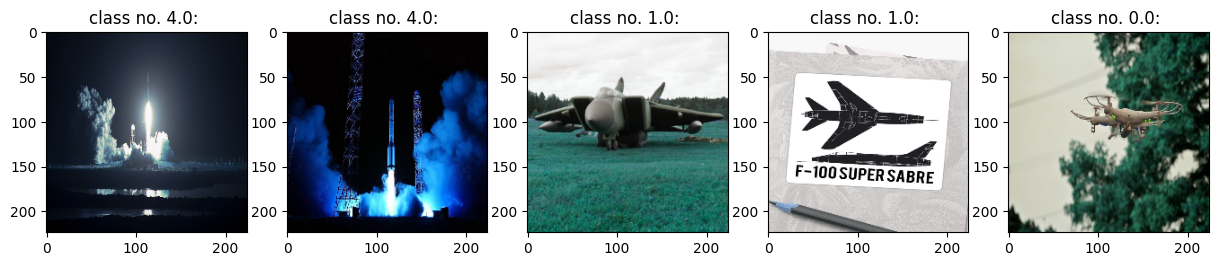

In [12]:
plt.figure(figsize=(15,5))
for i in range(5):
    plt.subplot(150 + 1 + i).set_title( f"class no. {y_train[i]}: " )
    plt.imshow( x_train[i] )
    #plt.axis( "off" )
plt.show()

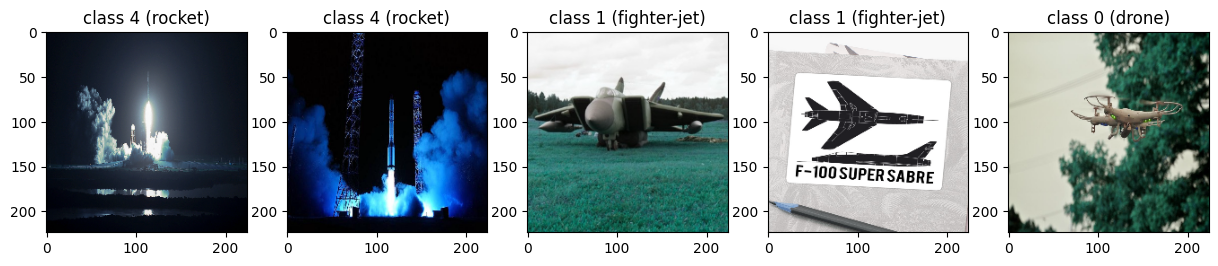

In [13]:
#visualize the first 5 image of x_train
label = ['drone', 'fighter-jet', 'helicopter', 'passenger-plane', 'rocket']

plt.figure(figsize = (15,5))
for i in range(5):
  plt.subplot(150 + 1 + i).set_title(f'class {int(y_train[i])} ({label[int(y_train[i])]})')
  plt.imshow(x_train[i])
plt.show()


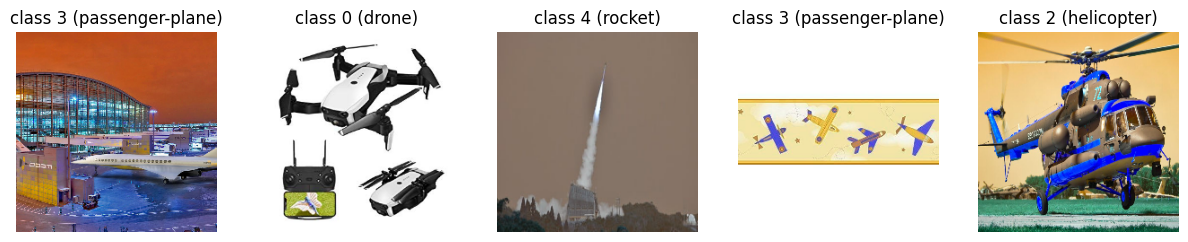

In [14]:
plt.figure(figsize=(15,5))

for i in range(5):
    class_index = int(y_test[i])  # Cast the value to integer
    class_name = label[class_index]
    plt.subplot(150 + 1 + i).set_title(f'class {class_index} ({class_name})')
    plt.imshow(x_test[i])
    plt.axis('off')  # Hide axis for better visualization

plt.show()


**LOAD MODEL**

In [15]:
img_w,img_h = 224, 224
mbnet_extractor = tf.keras.applications.mobilenet_v2.MobileNetV2(weights = "imagenet", include_top=False, input_shape = (img_w, img_h, 3))

mbnet_extractor.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [16]:
#Recursively freeze all layers in the model first
mbnet_extractor.trainable = False

for i, layer in enumerate(mbnet_extractor.layers):
  print(f'Layer {i}: Name = {layer.name}, Trainable = {layer.trainable}')

Layer 0: Name = input_1, Trainable = False
Layer 1: Name = Conv1, Trainable = False
Layer 2: Name = bn_Conv1, Trainable = False
Layer 3: Name = Conv1_relu, Trainable = False
Layer 4: Name = expanded_conv_depthwise, Trainable = False
Layer 5: Name = expanded_conv_depthwise_BN, Trainable = False
Layer 6: Name = expanded_conv_depthwise_relu, Trainable = False
Layer 7: Name = expanded_conv_project, Trainable = False
Layer 8: Name = expanded_conv_project_BN, Trainable = False
Layer 9: Name = block_1_expand, Trainable = False
Layer 10: Name = block_1_expand_BN, Trainable = False
Layer 11: Name = block_1_expand_relu, Trainable = False
Layer 12: Name = block_1_pad, Trainable = False
Layer 13: Name = block_1_depthwise, Trainable = False
Layer 14: Name = block_1_depthwise_BN, Trainable = False
Layer 15: Name = block_1_depthwise_relu, Trainable = False
Layer 16: Name = block_1_project, Trainable = False
Layer 17: Name = block_1_project_BN, Trainable = False
Layer 18: Name = block_2_expand, Traina

**PRE PROCESSING DATA**

In [17]:
#Pre-processing
x_train_vgg = tf.keras.applications.mobilenet_v2.preprocess_input(x_train)
x_test_vgg = tf.keras.applications.mobilenet_v2.preprocess_input(x_test)

print(x_train_vgg.shape)
print(x_test_vgg.shape)


(3082, 224, 224, 3)
(771, 224, 224, 3)


**FINE-TUNE BY UNFREEZE LAYER**

In [18]:
#Access a layer by name
b = mbnet_extractor.get_layer('Conv_1')
print(f'Layer {b}: Name = {b.name}, Trainable = {b.trainable}')

b.trainable=True

Layer <keras.layers.convolutional.conv2d.Conv2D object at 0x0000014977ACACA0>: Name = Conv_1, Trainable = False


In [19]:
#Iterate over all layers in the model
for i, layer in enumerate(mbnet_extractor.layers):
  print(f'Layer {i}: Name = {layer.name}, Trainable = {layer.trainable}')

Layer 0: Name = input_1, Trainable = False
Layer 1: Name = Conv1, Trainable = False
Layer 2: Name = bn_Conv1, Trainable = False
Layer 3: Name = Conv1_relu, Trainable = False
Layer 4: Name = expanded_conv_depthwise, Trainable = False
Layer 5: Name = expanded_conv_depthwise_BN, Trainable = False
Layer 6: Name = expanded_conv_depthwise_relu, Trainable = False
Layer 7: Name = expanded_conv_project, Trainable = False
Layer 8: Name = expanded_conv_project_BN, Trainable = False
Layer 9: Name = block_1_expand, Trainable = False
Layer 10: Name = block_1_expand_BN, Trainable = False
Layer 11: Name = block_1_expand_relu, Trainable = False
Layer 12: Name = block_1_pad, Trainable = False
Layer 13: Name = block_1_depthwise, Trainable = False
Layer 14: Name = block_1_depthwise_BN, Trainable = False
Layer 15: Name = block_1_depthwise_relu, Trainable = False
Layer 16: Name = block_1_project, Trainable = False
Layer 17: Name = block_1_project_BN, Trainable = False
Layer 18: Name = block_2_expand, Traina

**DATA AUGMENT**

In [20]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        #rescale=1. / 255,
        #featurewise_center=True,
        samplewise_center=True,
        #featurewise_std_normalization=True,
        samplewise_std_normalization=True,
        #zca_whitening=False,
        rotation_range=0,
        width_shift_range=5.0,
        height_shift_range=5.0,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.3)
train_datagen.fit(x_train_vgg)

In [21]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        #rescale=1. / 255,
        # featurewise_center=True,
        samplewise_center=True,
        # featurewise_std_normalization=True,
        samplewise_std_normalization=True
        )
test_datagen.fit(x_test_vgg)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


===== Train batch no. 1/1 =====


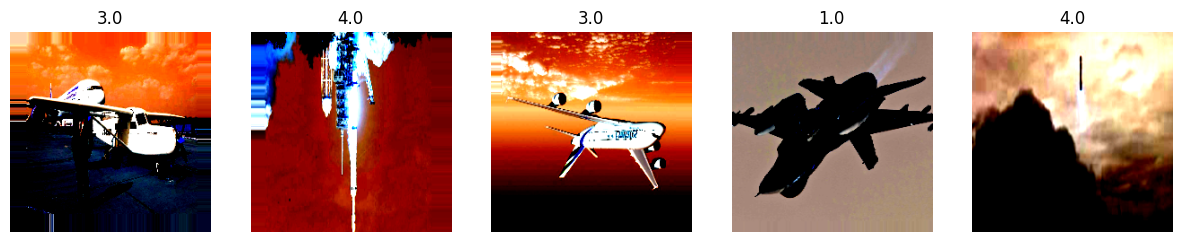

In [22]:
n_show = 1    # show 'n_show' batches of generated data (1 batch includes 5 images)

for b, (x_batch, y_batch) in enumerate( train_datagen.flow( x_train, y_train, batch_size=5, subset='training' ) ):
  print( f"===== Train batch no. {b+1}/{n_show} =====" )
  plt.figure(figsize=(15,5))
  for i in range(5):
      plt.subplot(150 + 1 + i).set_title( y_batch[i] )
      plt.imshow( x_batch[i])
      plt.axis( "off" )        # remove all tick marks
  plt.show()

  if b+1 >= n_show:
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


===== Train batch no. 1/1 =====


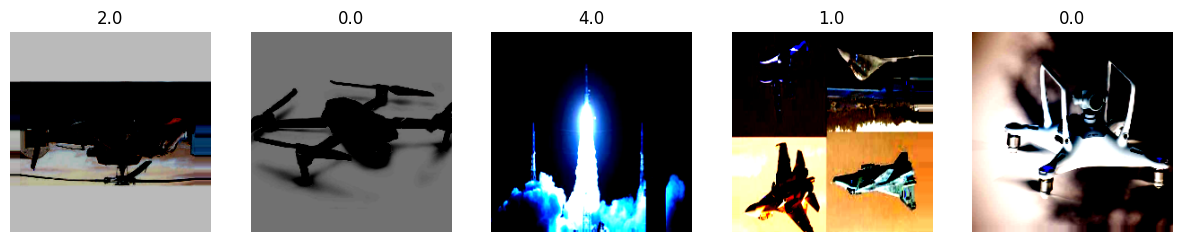

In [23]:
n_show = 1    # show 'n_show' batches of generated data (1 batch includes 5 images)

for b, (x_batch, y_batch) in enumerate( train_datagen.flow( x_train, y_train, batch_size=5, subset='validation' ) ):
  print( f"===== Train batch no. {b+1}/{n_show} =====" )
  plt.figure(figsize=(15,5))
  for i in range(5):
      plt.subplot(150 + 1 + i).set_title( y_batch[i] )
      plt.imshow( x_batch[i])
      plt.axis( "off" )        # remove all tick marks
  plt.show()

  if b+1 >= n_show:
    break

In [24]:
x = mbnet_extractor.output

#Add our custom layer(s) to the end of the existing model
x = tf.keras.layers.GlobalAveragePooling2D()(x)  # using GlobalAveragePooling2D to reduce spatial dimensions
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
new_outputs = tf.keras.layers.Dense(5, activation="softmax")(x)

#construct the main model
model = tf.keras.models.Model(inputs = mbnet_extractor.inputs, outputs = new_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

                                                                                                  
 block_2_expand_BN (BatchNormal  (None, 56, 56, 144)  576        ['block_2_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_2_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_2_expand_BN[0][0]']      
                                                                                                  
 block_2_depthwise (DepthwiseCo  (None, 56, 56, 144)  1296       ['block_2_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_2_depthwise_BN (BatchNor  (None, 56, 56, 144)  576        ['block_2_depthwise[0][0]']      
 malizatio

**TRAIN & EVALUATE**

In [25]:
print(y_train.shape)
print(y_train.dtype)


(3082,)
float32


In [26]:
num_classes = len(np.unique(y_train))
print(num_classes)

5


In [27]:
y_train[0:10]

array([4., 4., 1., 1., 0., 3., 1., 2., 4., 1.], dtype=float32)

In [28]:
# from wandb.keras import WandbCallback

# wandb.login()

# project = "ter_mobilenetV2_finetuning_new"
epochs = 20
learning_rate = 0.001
batch_size = 16

# config={
#     "architecture": "CNN",
#     "dataset": "Air Vehicle",
#     "epochs": epochs,
#     "learning_rate": learning_rate, 
#     "batch_size": batch_size
#     }

# # Initialize wandb with your project name and any other configuration you need
# wandb.init(project=project, entity="deep-a", config=config)

In [29]:
from tensorflow.keras.optimizers import Adam
from traitlets import validate

optimizer = Adam(learning_rate=learning_rate)

model.compile( loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"] )

In [30]:
history = model.fit(train_datagen.flow(x_train_vgg ,y_train,batch_size=32,subset='training'),epochs = epochs, verbose = 1,
                    validation_data=train_datagen.flow(x_train_vgg ,y_train,batch_size=batch_size,subset='validation'))
                    # ,callbacks=[WandbCallback()])

Epoch 1/20


68/68 [==============================] - 62s 722ms/step - loss: 0.8250 - acc: 0.7173 - val_loss: 0.5120 - val_acc: 0.8268
Epoch 2/20
68/68 [==============================] - 47s 700ms/step - loss: 0.4124 - acc: 0.8494 - val_loss: 0.4182 - val_acc: 0.8452
Epoch 3/20
68/68 [==============================] - 46s 676ms/step - loss: 0.3279 - acc: 0.8837 - val_loss: 0.4532 - val_acc: 0.8409
Epoch 4/20
68/68 [==============================] - 47s 678ms/step - loss: 0.2703 - acc: 0.9041 - val_loss: 0.4481 - val_acc: 0.8474
Epoch 5/20
68/68 [==============================] - 47s 704ms/step - loss: 0.2529 - acc: 0.9138 - val_loss: 0.3740 - val_acc: 0.8647
Epoch 6/20
68/68 [==============================] - 36s 533ms/step - loss: 0.2111 - acc: 0.9245 - val_loss: 0.4605 - val_acc: 0.8593
Epoch 7/20
68/68 [==============================] - 20s 298ms/step - loss: 0.1689 - acc: 0.9361 - val_loss: 0.4121 - val_acc: 0.8669
Epoch 8/20
68/68 [==============================] - 20s 299ms/step - loss: 0.129

In [31]:
# wandb.finish()

In [32]:
results = model.evaluate(test_datagen.flow(x_test_vgg, y_test, batch_size = 128))
print(f'{model.metrics_names}: {results}')

7/7 [==============================] - 1s 93ms/step - loss: 0.6155 - acc: 0.8781
['loss', 'acc']: [0.6154532432556152, 0.878080427646637]


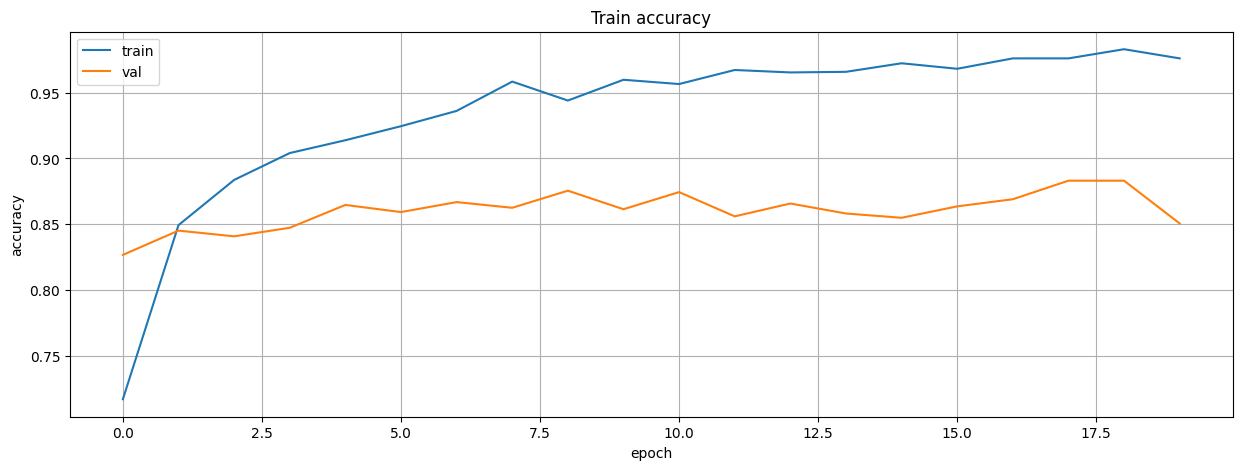

In [33]:
#Summarize history of accuracy
plt.figure(figsize = (15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.grid()
plt.show()

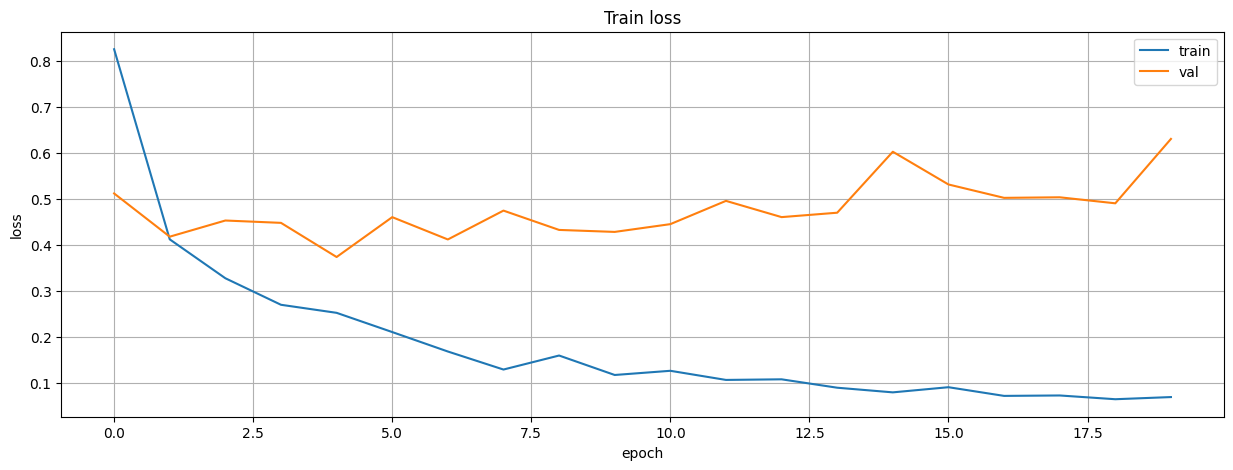

In [34]:
#Summarize history for loss
plt.figure(figsize = (15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper right')
plt.grid()
plt.show()

In [35]:
plt.rcParams["axes.linewidth"] = 5

def color_frame( ax, y_true, y_pred ):
  color = 'green' if (y_true == y_pred) else 'red'
  ax.spines['bottom'].set_color(color)
  ax.spines['top'].set_color(color)
  ax.spines['right'].set_color(color)
  ax.spines['left'].set_color(color)

samples.shape=(10, 224, 224, 3)
1/1 [==============================] - 1s 630ms/step


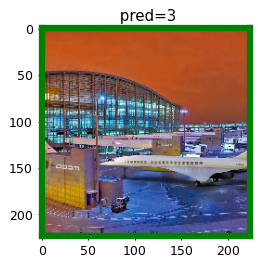

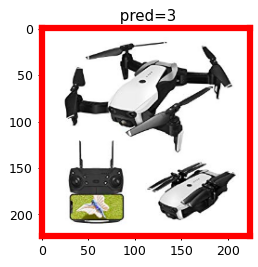

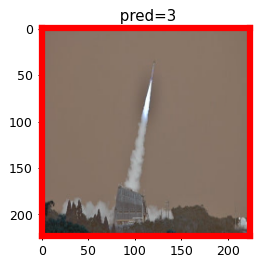

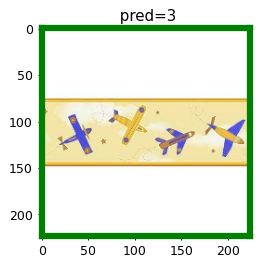

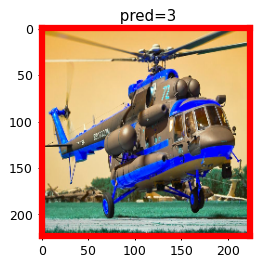

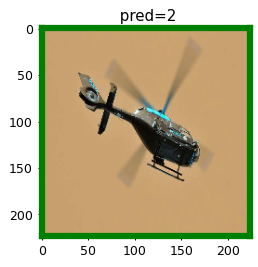

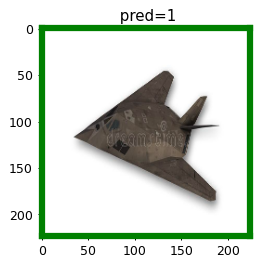

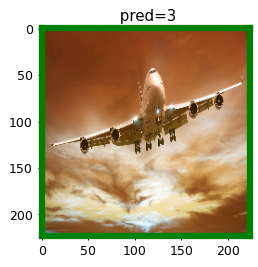

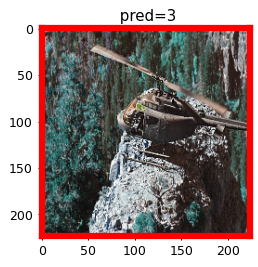

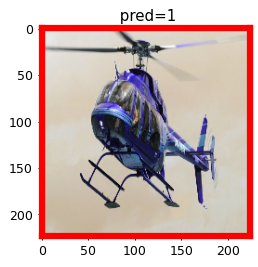

In [36]:
# Test using the model on many images


# Get a batch of samples
n = 10
samples = x_test[:n]
print(f'{samples.shape=}')

# Predict a batch of samples
y_pred = model.predict(samples)

# Interpret the results
for i in range(n):
  plt.figure(figsize=(3,3), dpi=90)
  ax = plt.gca()
  plt.imshow( x_test[i] )
  plt.title(f" pred={np.argmax(y_pred[i])}")
  color_frame(ax, y_test[i], np.argmax(y_pred[i]))
  plt.show()

**GRAD-CAM**

In [39]:
img_size = (224, 224)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
last_conv_layer_name = "out_relu"

1/1 [==============================] - 0s 22ms/step


Predicted: drone | Actual: drone 


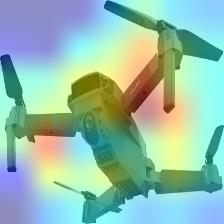

1/1 [==============================] - 0s 19ms/step
Predicted: passenger-plane | Actual: passenger-plane 


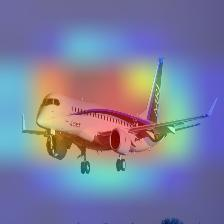

1/1 [==============================] - 0s 22ms/step
Predicted: helicopter | Actual: helicopter 


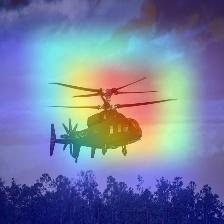

1/1 [==============================] - 0s 21ms/step
Predicted: fighter-jet | Actual: fighter-jet 


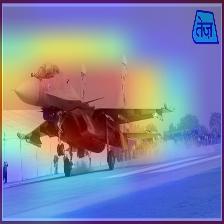

1/1 [==============================] - 0s 21ms/step
Predicted: passenger-plane | Actual: passenger-plane 


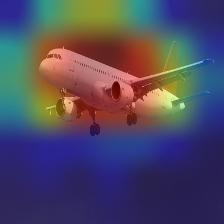

In [40]:
from IPython.display import Image, display
import matplotlib.cm as cmp


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
          last_conv_layer_output, preds = grad_model(img_array)
          if pred_index is None:
              pred_index = tf.argmax(preds[0])
          class_channel = preds[:, pred_index]
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.8):
      img = img_path

      # Rescale heatmap to a range 0-255
      heatmap = np.uint8(255 * heatmap)

      # Use jet colormap to colorize heatmap
      jet = plt.get_cmap("jet")

      # Use RGB values of the colormap
      jet_colors = jet(np.arange(256))[:, :3]
      jet_heatmap = jet_colors[heatmap]

      # Create an image with RGB colorized heatmap
      jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
      jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
      jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

      # Superimpose the heatmap on original image
      superimposed_img = jet_heatmap * alpha + img
      superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

      # Save the superimposed image
      superimposed_img.save(cam_path)

      # Display Grad CAM
      display(Image(cam_path))

for i in range(5):
  c= np.random.randint(0,180)
  img_path = x_test[c]
  img_array = preprocess_input(img_path)
  model.layers[-1].activation = None
  preds = model.predict(img_array.reshape(-1,224,224,3))
  print(f"Predicted: {label[int(np.argmax(preds))]} | Actual: {label[int(y_test[c])]} ")
  heatmap = make_gradcam_heatmap(img_array.reshape(1,224,224,3), model, last_conv_layer_name)
  save_and_display_gradcam(img_path, heatmap)